In [38]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, validation_curve, StratifiedShuffleSplit,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
from helpers import make_complexity_curve, make_learning_curve
from sklearn.ensemble import AdaBoostClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Load Cleaned Adult Data**

In [11]:
adult_df = pd.read_csv(filepath_or_buffer="adult_cleaned.csv")
adult_df_dummies = pd.get_dummies(adult_df.drop('target', 1))
adult_x = adult_df_dummies.copy().values
adult_y = adult_df["target"].copy().values
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_x, adult_y, test_size=0.3,random_state=0)

**Load Cleaned Titanic Data**

In [60]:
titanic_train = pd.read_csv(filepath_or_buffer="titanic_train_cleaned.csv")
titanic_test = pd.read_csv(filepath_or_buffer="titanic_test_cleaned.csv")
X_titanic_train = pd.get_dummies(titanic_train.drop("Survived", 1)).copy().values
y_titanic_train = titanic_train["Survived"]

titanic_test

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,34,0,7.8292,Q,0,1.0,1,Mr
1,3,0,47,0,7.0000,S,0,2.0,0,Mrs
2,2,1,62,0,9.6875,Q,0,1.0,1,Mr
3,3,1,27,0,8.6625,S,0,1.0,1,Mr
4,3,0,22,1,12.2875,S,0,2.0,0,Mrs
5,3,1,14,0,9.2250,S,0,1.0,1,Mr
6,3,0,30,0,7.6292,Q,0,1.0,1,Miss
7,2,1,26,1,29.0000,S,0,3.0,0,Mr
8,3,0,18,0,7.2292,C,0,3.0,0,Mrs
9,3,1,21,0,24.1500,S,0,3.0,0,Mr


**GridSearch**

In [43]:
params = {
    'n_estimators':[1,2,5,10,20,30,45,60,80,100],
    'base_estimator__max_depth': list(np.arange(1, 50, 1))
}

In [44]:
adult_cv = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=123),param_grid=params, cv=5)
adult_cv.fit(X_adult_train, y_adult_train)
print(f"best params adult: {adult_cv.best_params_}")

best params adult: {'base_estimator__max_depth': 2, 'n_estimators': 100}


In [45]:
titanic_cv = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=123),param_grid=params, cv=5)
titanic_cv.fit(X_titanic_train, y_titanic_train)
titanic_cv.best_params_
print(f"best params titanic: {titanic_cv.best_params_}")

best params titanic: {'base_estimator__max_depth': 2, 'n_estimators': 30}


In [56]:
titanic_cv.predict(X_titanic_test, y_titanic_test)

NameError: name 'X_titanic_test' is not defined

**Learning Curve**

best size: 19001


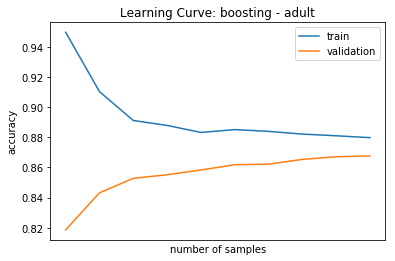

In [46]:
make_learning_curve(adult_cv.best_estimator_,X_adult_train,y_adult_train,np.linspace(0.1, 1.0, 10),10,"boosting","adult")

best size: 801


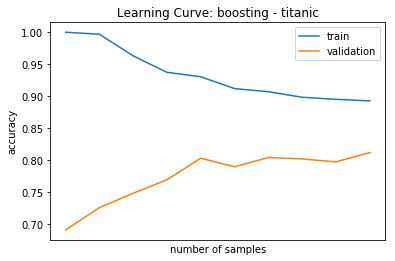

In [47]:
make_learning_curve(titanic_cv.best_estimator_, X_titanic_train, y_titanic_train, np.linspace(0.1, 1.0, 10), 10, "boosting", "titanic")

**n_estimators**

Model Complexity Curve: booster - adult (n_estimators)
best n_estimators: 60


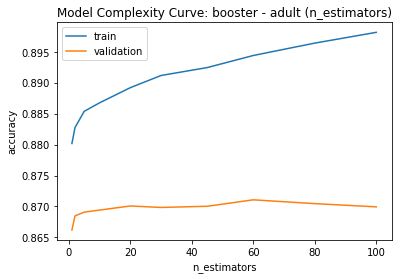

Complexity curve complete


In [48]:
clf = AdaBoostClassifier(base_estimator=adult_cv.best_estimator_,random_state=55)
make_complexity_curve(clf, X_adult_train, y_adult_train, "n_estimators", [1,2,5,10,20,30,45,60,80,100],5,"booster","adult")

Model Complexity Curve: booster - titanic (n_estimators)
best n_estimators: 2


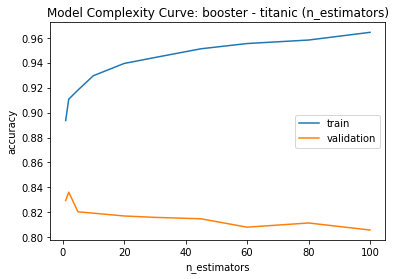

Complexity curve complete


In [50]:
clf = AdaBoostClassifier(base_estimator=titanic_cv.best_estimator_,random_state=55)
make_complexity_curve(clf, X_titanic_train, y_titanic_train, "n_estimators", [1,2,5,10,20,30,45,60,80,100],5,"booster","titanic")

**base_estimator__max_depth**

Model Complexity Curve: booster - adult (base_estimator__max_depth)
best base_estimator__max_depth: 2


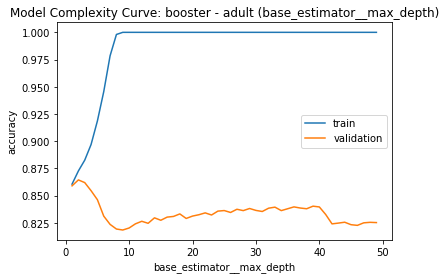

Complexity curve complete


In [51]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=55)
make_complexity_curve(clf, X_adult_train, y_adult_train, "base_estimator__max_depth", list(np.arange(1, 50, 1)),5,"booster","adult")

Model Complexity Curve: booster - titanic (base_estimator__max_depth)
best base_estimator__max_depth: 2


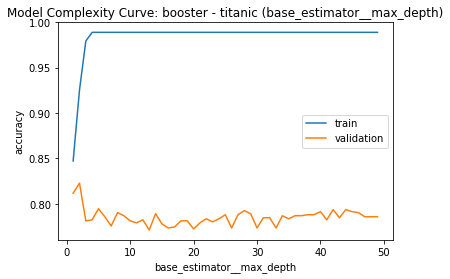

Complexity curve complete


In [52]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=55)
make_complexity_curve(clf, X_titanic_train, y_titanic_train, "base_estimator__max_depth", list(np.arange(1, 50, 1)),5,"booster","titanic")

**n_estimators with max_depths** 

Model Complexity Curve: booster_max_depth=1 - adult (n_estimators)
best n_estimators: 100


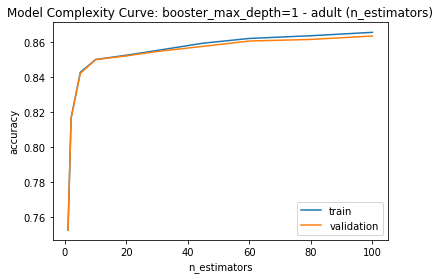

Complexity curve complete
Model Complexity Curve: booster_max_depth=2 - adult (n_estimators)
best n_estimators: 100


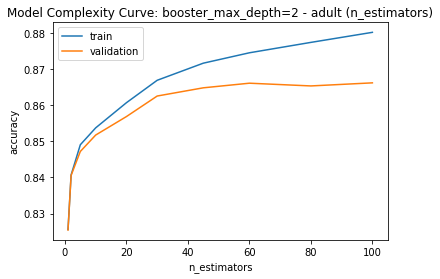

Complexity curve complete
Model Complexity Curve: booster_max_depth=3 - adult (n_estimators)
best n_estimators: 30


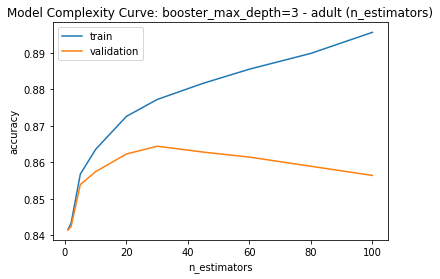

Complexity curve complete
Model Complexity Curve: booster_max_depth=4 - adult (n_estimators)
best n_estimators: 20


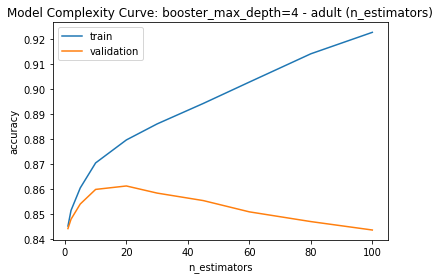

Complexity curve complete
Model Complexity Curve: booster_max_depth=5 - adult (n_estimators)
best n_estimators: 10


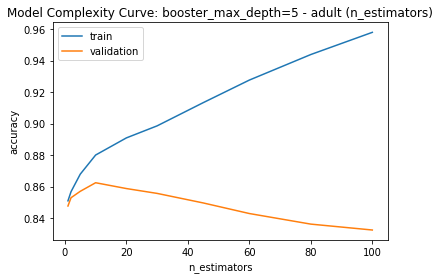

Complexity curve complete
Model Complexity Curve: booster_max_depth=6 - adult (n_estimators)
best n_estimators: 5


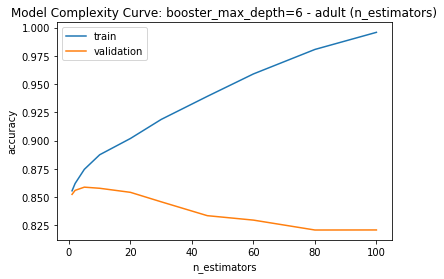

Complexity curve complete
Model Complexity Curve: booster_max_depth=7 - adult (n_estimators)
best n_estimators: 2


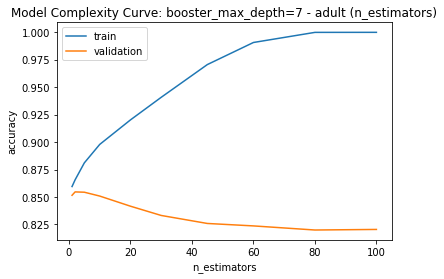

Complexity curve complete
Model Complexity Curve: booster_max_depth=8 - adult (n_estimators)
best n_estimators: 2


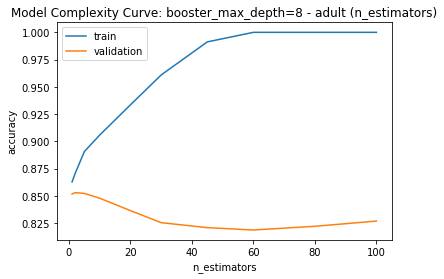

Complexity curve complete
Model Complexity Curve: booster_max_depth=9 - adult (n_estimators)
best n_estimators: 2


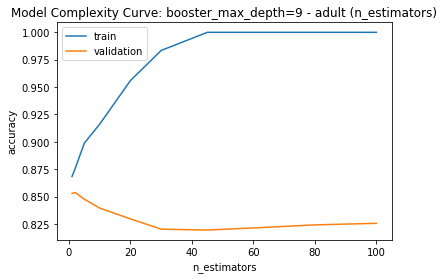

Complexity curve complete
Model Complexity Curve: booster_max_depth=10 - adult (n_estimators)
best n_estimators: 2


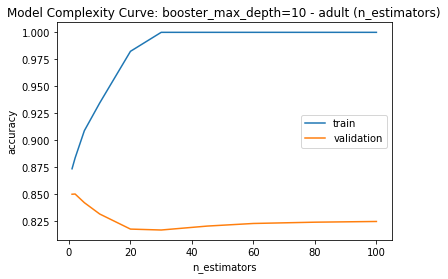

Complexity curve complete


In [53]:
for max_depth in range(1,11):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=max_depth),random_state=55)
    make_complexity_curve(clf, X_adult_train, y_adult_train,"n_estimators",[1,2,5,10,20,30,45,60,80,100],5, f"booster_max_depth={max_depth}","adult")

Model Complexity Curve: booster_max_depth=1 - titanic (n_estimators)
best n_estimators: 10


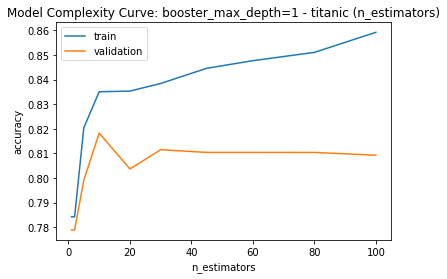

Complexity curve complete
Model Complexity Curve: booster_max_depth=2 - titanic (n_estimators)
best n_estimators: 30


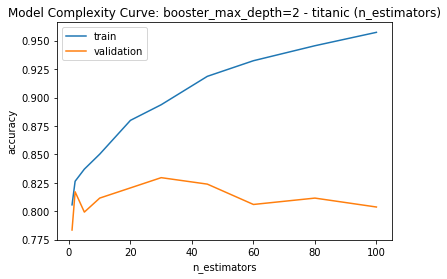

Complexity curve complete
Model Complexity Curve: booster_max_depth=3 - titanic (n_estimators)
best n_estimators: 1


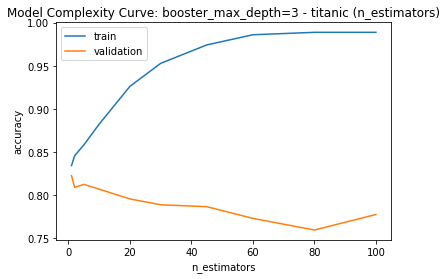

Complexity curve complete
Model Complexity Curve: booster_max_depth=4 - titanic (n_estimators)
best n_estimators: 1


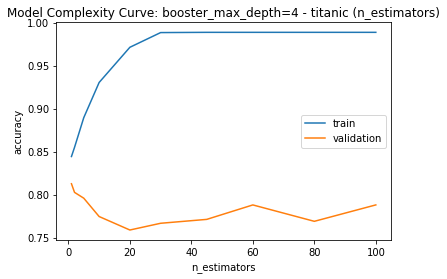

Complexity curve complete
Model Complexity Curve: booster_max_depth=5 - titanic (n_estimators)
best n_estimators: 1


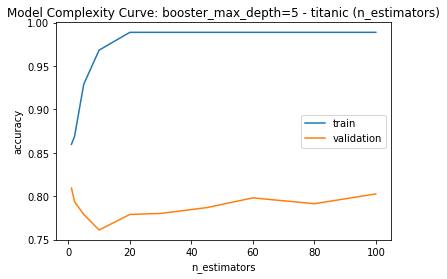

Complexity curve complete
Model Complexity Curve: booster_max_depth=6 - titanic (n_estimators)
best n_estimators: 1


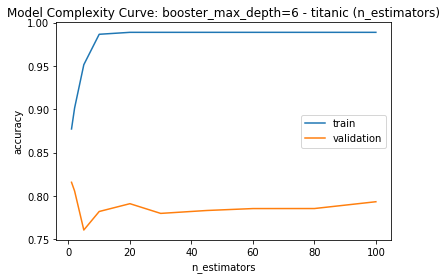

Complexity curve complete
Model Complexity Curve: booster_max_depth=7 - titanic (n_estimators)
best n_estimators: 1


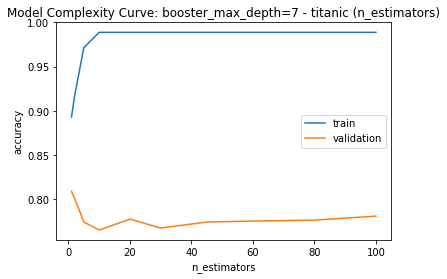

Complexity curve complete
Model Complexity Curve: booster_max_depth=8 - titanic (n_estimators)
best n_estimators: 1


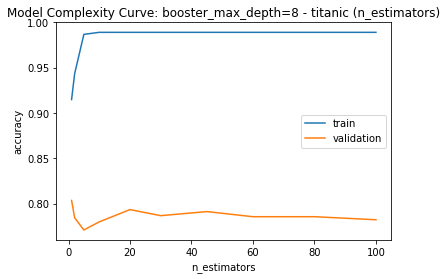

Complexity curve complete
Model Complexity Curve: booster_max_depth=9 - titanic (n_estimators)
best n_estimators: 30


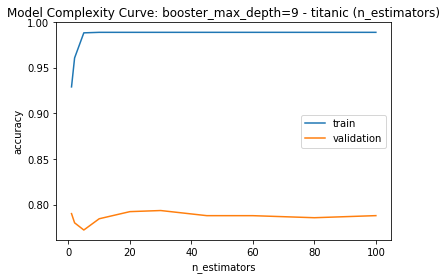

Complexity curve complete
Model Complexity Curve: booster_max_depth=10 - titanic (n_estimators)
best n_estimators: 1


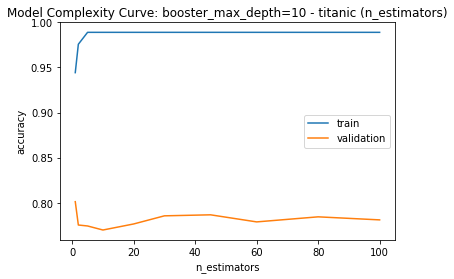

Complexity curve complete


In [54]:
for max_depth in range(1,11):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=max_depth),random_state=55)
    make_complexity_curve(clf, X_titanic_train, y_titanic_train,"n_estimators",[1,2,5,10,20,30,45,60,80,100],5, f"booster_max_depth={max_depth}","titanic")